
=== Customer Segmentation ===
Customer Segments:
 segment_smb            3061
segment_non_smb       10356
segment_commercial     1179
segment_enterprise      553
segment_midmarket       423
dtype: int64


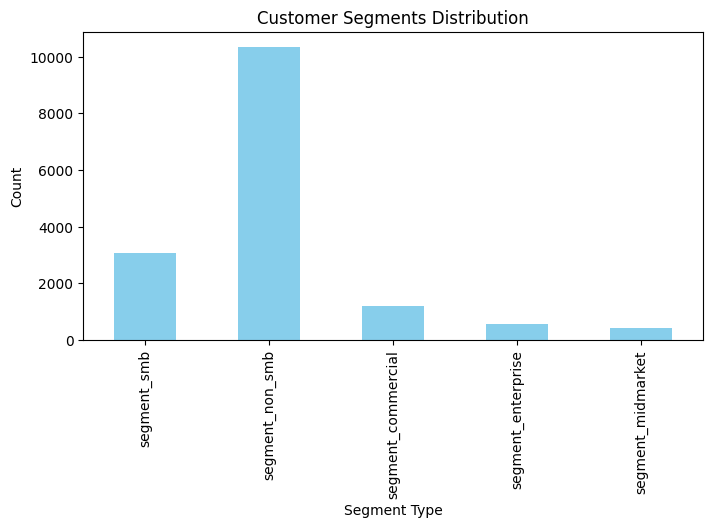


=== Customer Feedback Trends ===


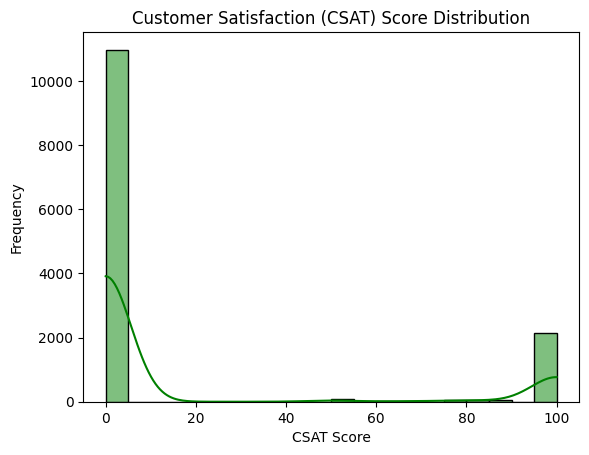


=== Product Sales Trends ===


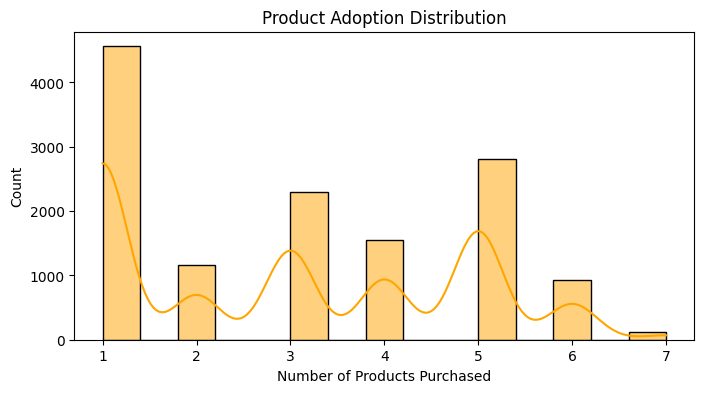


=== Top Selling Products ===
Top Product Sales:
 team_plus    11503
pro_plus      7760
ent_plus      1935
dtype: int64


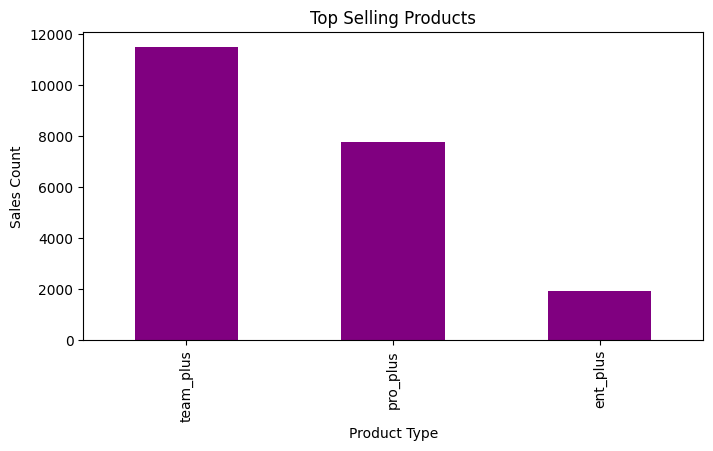


=== Upsell & Cross-Sell Success Rates ===


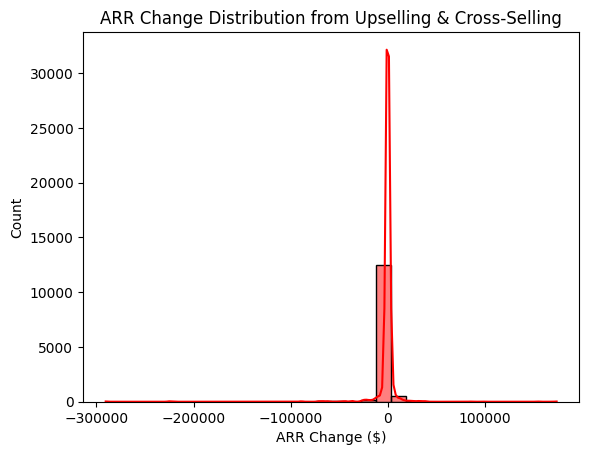


=== Product Utilization Trends ===


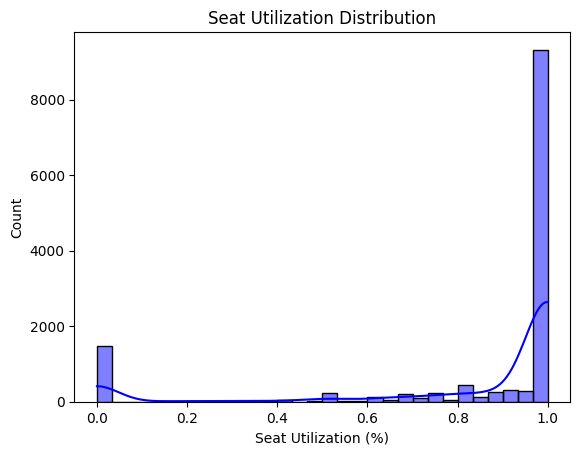


=== Correlation Between Usage & Upsell Success ===
Correlation Matrix:
                   seat_utilization  arr_change
seat_utilization          1.000000    0.039567
arr_change                0.039567    1.000000


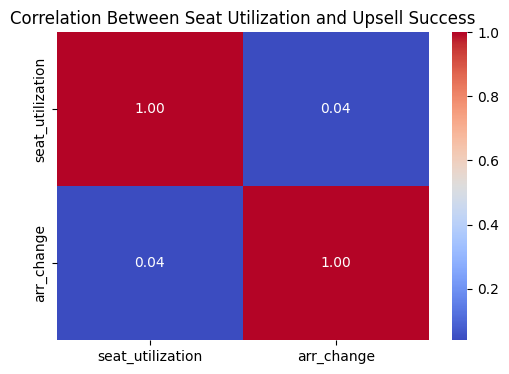

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned datasets
customer_df = pd.read_csv("customer.csv")
customer_feedback_df = pd.read_csv("customer_feedback.csv")
expansion_outcome_df = pd.read_csv("expansion_outcome.csv")
product_df = pd.read_csv("product.csv")
utilization_df = pd.read_csv("utilization.csv")

### 1. CUSTOMER BEHAVIOR & PREFERENCES ANALYSIS

# Customer Segmentation
print("\n=== Customer Segmentation ===")
if "segment_smb" in customer_df.columns:
    segments = customer_df[["segment_smb", "segment_non_smb", "segment_commercial", 
                            "segment_enterprise", "segment_midmarket"]].sum()
    print("Customer Segments:\n", segments)

    # Plot customer segmentation
    plt.figure(figsize=(8, 4))
    segments.plot(kind="bar", title="Customer Segments Distribution", color='skyblue')
    plt.xlabel("Segment Type")
    plt.ylabel("Count")
    plt.show()

# Customer Feedback Trends
print("\n=== Customer Feedback Trends ===")
if "csat_score" in customer_feedback_df.columns:
    sns.histplot(customer_feedback_df["csat_score"], bins=20, kde=True, color='green')
    plt.title("Customer Satisfaction (CSAT) Score Distribution")
    plt.xlabel("CSAT Score")
    plt.ylabel("Frequency")
    plt.show()

### 2. PRODUCT RELATIONSHIPS & SUITABILITY

# Product Sales Trends
print("\n=== Product Sales Trends ===")
if "product_counts" in customer_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(customer_df["product_counts"], bins=15, kde=True, color='orange')
    plt.title("Product Adoption Distribution")
    plt.xlabel("Number of Products Purchased")
    plt.ylabel("Count")
    plt.show()

# Top Selling Products
print("\n=== Top Selling Products ===")
if "discount_arr_usd" in product_df.columns:
    top_products = product_df[["team_plus", "pro_plus", "ent_plus"]].sum()
    print("Top Product Sales:\n", top_products)

    # Plot top products
    plt.figure(figsize=(8, 4))
    top_products.plot(kind="bar", title="Top Selling Products", color='purple')
    plt.xlabel("Product Type")
    plt.ylabel("Sales Count")
    plt.show()

### 3. EXPANSION & MARKET RESPONSE

# Upsell & Cross-Sell Success Rates
print("\n=== Upsell & Cross-Sell Success Rates ===")
if "arr_change" in expansion_outcome_df.columns:
    sns.histplot(expansion_outcome_df["arr_change"], bins=30, kde=True, color='red')
    plt.title("ARR Change Distribution from Upselling & Cross-Selling")
    plt.xlabel("ARR Change ($)")
    plt.ylabel("Count")
    plt.show()

### 4. USAGE PATTERNS & ENGAGEMENT

# Product Utilization Trends
print("\n=== Product Utilization Trends ===")
if "seat_utilization" in utilization_df.columns:
    sns.histplot(utilization_df["seat_utilization"], bins=30, kde=True, color='blue')
    plt.title("Seat Utilization Distribution")
    plt.xlabel("Seat Utilization (%)")
    plt.ylabel("Count")
    plt.show()

# Correlation between Usage & Upsell Success
print("\n=== Correlation Between Usage & Upsell Success ===")
if "seat_utilization" in utilization_df.columns and "arr_change" in expansion_outcome_df.columns:
    merged_df = pd.merge(utilization_df, expansion_outcome_df, on="id", how="inner")
    correlation = merged_df[["seat_utilization", "arr_change"]].corr()
    print("Correlation Matrix:\n", correlation)

    # Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Seat Utilization and Upsell Success")
    plt.show()



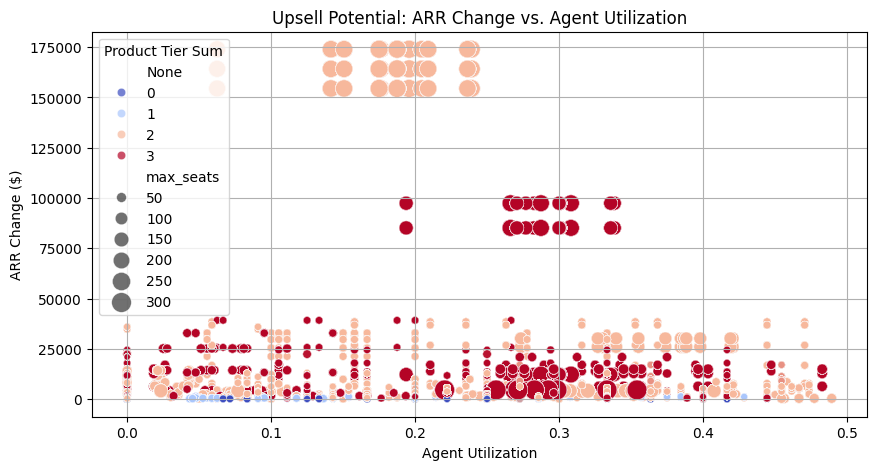

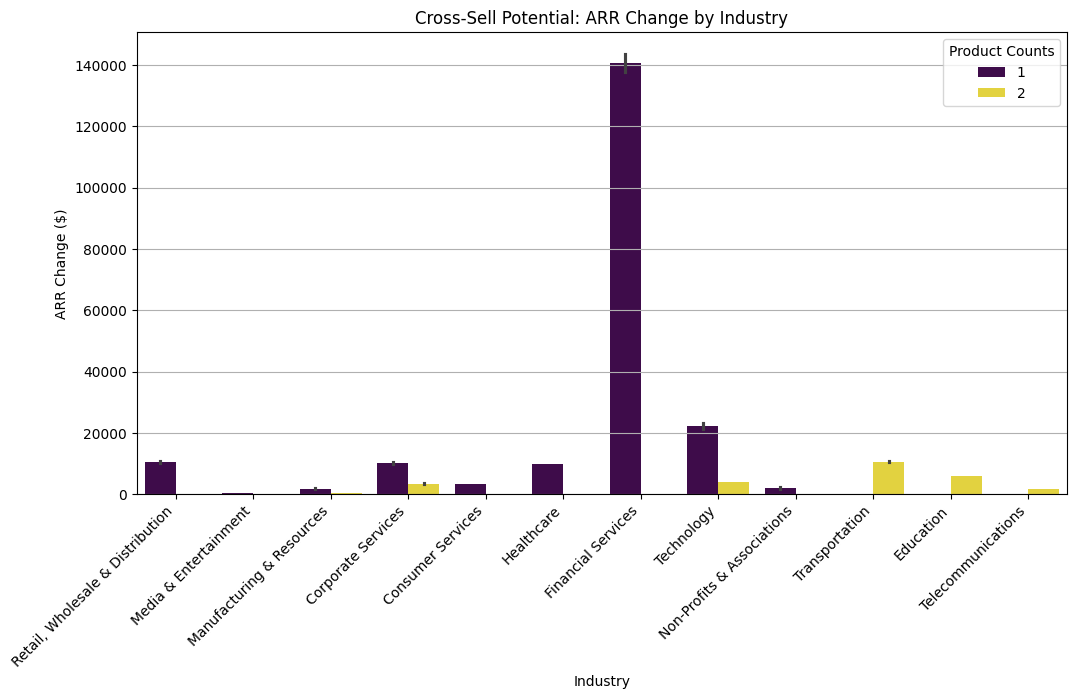

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (Ensure paths are correct if running locally)
customer_file = "customer.csv"
customer_feedback_file = "customer_feedback.csv"
expansion_outcome_file = "expansion_outcome.csv"
product_file = "product.csv"
utilization_file = "utilization.csv"

customer_df = pd.read_csv(customer_file)
expansion_outcome_df = pd.read_csv(expansion_outcome_file)
product_df = pd.read_csv(product_file)
utilization_df = pd.read_csv(utilization_file)

# Merge datasets for upsell analysis
upsell_candidates = expansion_outcome_df[expansion_outcome_df["arr_change"] > 0].merge(
    utilization_df[utilization_df["agent_utilization"] < 0.5], on="id"
).merge(product_df, on="id")

# Merge datasets for cross-sell analysis
cross_sell_candidates = expansion_outcome_df[expansion_outcome_df["arr_change"] > 0].merge(
    utilization_df[utilization_df["seat_utilization_increase"] > 0], on="id"
).merge(customer_df[customer_df["product_counts"] < 3], on="id")

# Visualization: Scatter Plot for Upsell Potential
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=upsell_candidates["agent_utilization"],
    y=upsell_candidates["arr_change"],
    size=upsell_candidates["max_seats"],
    hue=upsell_candidates["team_plus"] + upsell_candidates["pro_plus"] + upsell_candidates["ent_plus"],
    palette="coolwarm",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Upsell Potential: ARR Change vs. Agent Utilization")
plt.xlabel("Agent Utilization")
plt.ylabel("ARR Change ($)")
plt.legend(title="Product Tier Sum", loc="upper left")
plt.grid(True)
plt.show()

# Visualization: Bar Chart for Cross-Sell Potential
plt.figure(figsize=(12, 6))
sns.barplot(
    x=cross_sell_candidates["crm_industry_current"],
    y=cross_sell_candidates["arr_change"],
    hue=cross_sell_candidates["product_counts"],
    palette="viridis"
)
plt.title("Cross-Sell Potential: ARR Change by Industry")
plt.xlabel("Industry")
plt.ylabel("ARR Change ($)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Product Counts")
plt.grid(axis="y")
plt.show()


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("expansion_outcome.csv")

# Convert score_date to datetime
df["score_date"] = pd.to_datetime(df["score_date"], format="%d-%m-%Y")

# Sort by id and date
df.sort_values(by=["id", "score_date"], inplace=True)

# Create cross_sale column
df["cross_sale"] = df.groupby("id")["current_arr"].diff().gt(0).astype(int)

# Save to new CSV
df.to_csv("expansion_outcome_with_cross_sale.csv", index=False)
